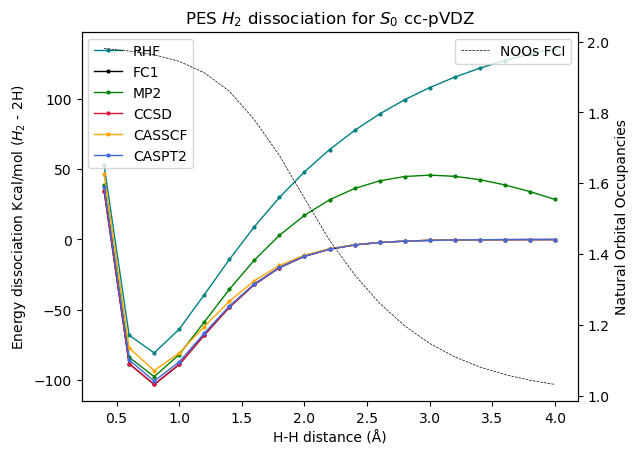

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

file_path = 'H2_dissociacion - PE-Orca.csv'
df = pd.read_csv(file_path)

casscf_path = 'S0_CASSCF_PES.csv'
caspt2_path = 'S0_CASPT2_PES.csv'
ccsd_path = './CCSD/CCSD_PES.csv'
mp2_path = './MP2/MP2_PES.csv'
fci_path = './S0_FCI/S0_FCI_PES.csv'

df_fci = pd.read_csv(fci_path)
df_ccsd = pd.read_csv(ccsd_path)
df_mp2 = pd.read_csv(mp2_path)
df_casscf = pd.read_csv(casscf_path)
df_caspt2 = pd.read_csv(caspt2_path)

#Extracting values from other files
RHF = df['RHF']
H = df['H']
distance = df_fci['Distance']
FCI = df_fci['FCI-energy']
CASSCF = df_casscf['CASSCF-energy']
CASPT2 = df_caspt2['CASPT2-energy']
CCSD = df_ccsd['CCSD-energy']
MP2 = df_mp2['MP2-energy']

#Values of reference for conversion of energy
cm = 219474.6
ev = 27.211
kj = 2625.5
kcal = 627.51
#Selecting a conversion factor
conv = kcal #Conversion using kcal/mol
#Converting all the values to kcal/mol
H_conv = (H * conv)
RHF_conv = (RHF * conv) - (2 * H_conv)
FCI_conv = (FCI * conv) - (2 * H_conv)
CASSCF_conv = (CASSCF * conv) - (2 * H_conv)
CASPT2_conv = (CASPT2 * conv) - (2 * H_conv)
CCSD_conv = (CCSD * conv) - (2 * H_conv)
MP2_conv = (MP2 * conv) - (2 * H_conv)
FCI_kcal = (FCI * conv) - (2 * H_conv)


#ARchivo de FCI
fci_path_g1 = './S0_FCI/S0_FCI.csv'
df_g1_fci = pd.read_csv(fci_path_g1)
FCI_0 = df_g1_fci['FCI-1']

# Creación de la figura y los ejes
fig, ax1 = plt.subplots()

# Plot histogram
ax1.plot(distance, RHF_conv[::-1], color='teal', linewidth=1, marker='o', markersize=2, label='RHF')
ax1.plot(distance, FCI_conv, color='black', linewidth=1, marker='o', markersize=2, label='FC1')
ax1.plot(distance, MP2_conv, color='green', linewidth=1, marker='o', markersize=2, label='MP2')
ax1.plot(distance, CCSD_conv, color='crimson', linewidth=1, marker='o', markersize=2, label='CCSD')
ax1.plot(distance, CASSCF_conv, color='orange', linewidth=1, marker='o', markersize=2, label='CASSCF')
ax1.plot(distance, CASPT2_conv, color='royalblue', linewidth=1, marker='o', markersize=2, label='CASPT2')
#plt.plot(distance1, NEVPT21, color='red', linewidth=1.5, marker='o', markersize=4, label='NEVPT2')
ax1.set_xlabel('H-H distance (Å)')
ax1.set_ylabel('Energy dissociation Kcal/mol ($H_2$ - 2H)')
ax1.legend(loc='upper left')

# Segunda serie de datos (ocupaciones)
ax2 = ax1.twinx()
ax2.plot(distance, FCI_0, color='black', linewidth=0.5, linestyle='dashed', label='NOOs FCI')
ax2.set_ylabel('Natural Orbital Occupancies')
ax2.legend(loc='upper right')
#Title of the plot
plt.title('PES $H_2$ dissociation for $S_0$ cc-pVDZ')

# SAVING THE PLOT
plt.savefig('H2_S0_PES', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

# Plot histogram


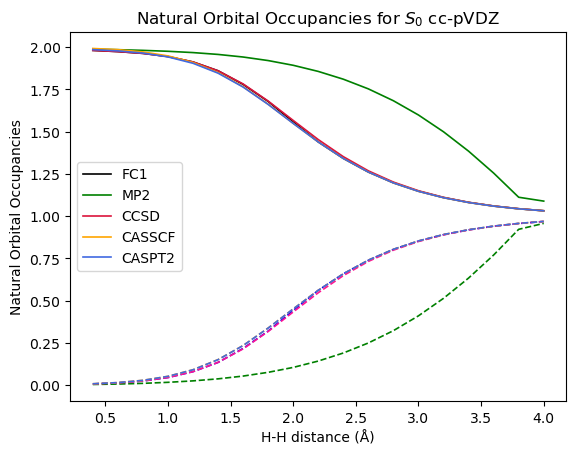

In [4]:
fci_path_g1 = './S0_FCI/S0_FCI.csv'
ccsd_path_g1 = './CCSD/CCSD.csv'
mp2_path_g1 = './MP2/MP2.csv'
casscf_path_g1 = 'CASSCF.csv'
caspt2_path_g1 = 'CASPT2.csv'

df_g1_fci = pd.read_csv(fci_path_g1)
df_g1_ccsd = pd.read_csv(ccsd_path_g1)
df_g1_mp2 = pd.read_csv(mp2_path_g1)
df_g1_casscf = pd.read_csv(casscf_path_g1)
df_g1_caspt2 = pd.read_csv(caspt2_path_g1)


#Extracting values from FCI file
FCI_0 = df_g1_fci['FCI-1']
FCI_1 = df_g1_fci['FCI-2']

#Extracting values from CCSD file
CCSD_0 = df_g1_ccsd['CCSD-1']
CCSD_1 = df_g1_ccsd['CCSD-2']

#Extracting values from MP2 file
MP2_0 = df_g1_mp2['MP2-1']
MP2_1 = df_g1_mp2['MP2-2']

#Extracting values from casscf file
distance = df_g1_casscf['Distance']
CASSCF_0 = df_g1_casscf['CASSCF-1']
CASSCF_1 = df_g1_casscf['CASSCF-2']

#Extracting values from casscf file
CASPT2_0 = df_g1_caspt2['CASPT2-1']
CASPT2_1 = df_g1_caspt2['CASPT2-2']


# Plot histogram
plt.plot(distance, FCI_0, color='black', linewidth=1.2, label='FC1')
plt.plot(distance, MP2_0, color='green', linewidth=1.2, label='MP2')
plt.plot(distance, CCSD_0, color='crimson', linewidth=1.2, label='CCSD')
plt.plot(distance, CASSCF_0, color='orange', linewidth=1.2, label='CASSCF')
plt.plot(distance, CASPT2_0, color='royalblue', linewidth=1.2, label='CASPT2')
plt.plot(distance, FCI_1, color='blue', linewidth=1.2, linestyle='--')
plt.plot(distance, MP2_1, color='green', linewidth=1.2, linestyle='--')
plt.plot(distance, CCSD_1, color='deeppink', linewidth=1.2, linestyle='--')
plt.plot(distance, CASSCF_1, color='orange', linewidth=1.2, linestyle='--')
plt.plot(distance, CASPT2_1, color='royalblue', linewidth=1.2, linestyle='--')


plt.xlabel('H-H distance (Å)')
plt.ylabel('Natural Orbital Occupancies')
plt.title('Natural Orbital Occupancies for $S_0$ cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
plt.savefig('NOOs_S0.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()


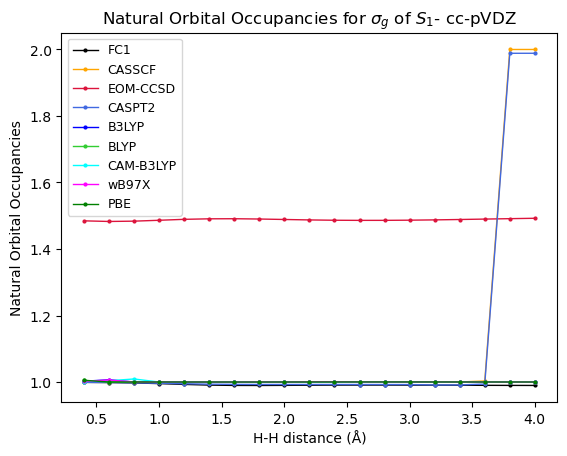

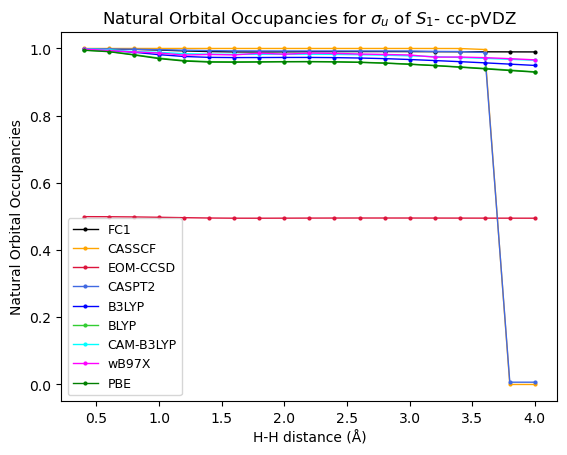

In [5]:
# SECTION OF ELECTRONIC METHODS
eom_path_g2 = './eom-ccsd/all_EOM.csv'
casscf_path_g2 = 'S1_CASSCF.csv'
caspt2_path_g2 = 'S1_CASPT2.csv'
fci_path_g2 = './S1_FCI/S1_FCI.csv'

df_g2_eom = pd.read_csv(eom_path_g2)
df_g2_casscf = pd.read_csv(casscf_path_g2)
df_g2_caspt2 = pd.read_csv(caspt2_path_g2)
df_g2_fci = pd.read_csv(fci_path_g2)

#Extracting values from FCI file
FCI_0 = df_g2_fci['FCI-1']
FCI_1 = df_g2_fci['FCI-2']

#Extracting values from eom-ccsd file
EOM_0 = df_g2_eom['Occ1']
EOM_1 = df_g2_eom['Occ2']

#Extracting values from casscf file
distance = df_g2_casscf['Distance']
CASSCF_0 = df_g2_casscf['CASSCF-1']
CASSCF_1 = df_g2_casscf['CASSCF-2']

#Extracting values from casscf file
CASPT2_0 = df_g2_caspt2['CASPT2-1']
CASPT2_1 = df_g2_caspt2['CASPT2-2']


# SECTION OF TDDFT METHODS
#Reading file 1
file_B3LYP = './tddft/B3LYP/B3LYP.csv'
df_B3LYP = pd.read_csv(file_B3LYP)

distance = df_B3LYP['Distance']
B3LYP_0 = df_B3LYP['B3LYP-1']
B3LYP_1 = df_B3LYP['B3LYP-2']

#Reading file 2
file_BLYP = './tddft/BLYP/BLYP.csv'
df_BLYP = pd.read_csv(file_BLYP)

BLYP_0 = df_BLYP['BLYP-1']
BLYP_1 = df_BLYP['BLYP-2']

#Reading file 3
file_PBE = './tddft/PBE/PBE.csv'
df_PBE = pd.read_csv(file_PBE)

PBE_0 = df_PBE['PBE-1']
PBE_1 = df_PBE['PBE-2']

#Reading file 4
file_CAM = './tddft/CAM-B3LYP/CAM-B3LYP.csv'
df_CAM = pd.read_csv(file_CAM)

CAM_0 = df_CAM['CAM-1']
CAM_1 = df_CAM['CAM-2']

#Reading file 4
file_wB97X = './tddft/wB97X/wB97X.csv'
df_wB97X = pd.read_csv(file_wB97X)

wB97X_0 = df_wB97X['wB97X-1']
wB97X_1 = df_wB97X['wB97X-2']



# Plot histogram for first orbital
plt.plot(distance, FCI_0, color='black', linewidth=1, marker='o', markersize=2, label='FC1')
plt.plot(distance, CASSCF_0, color='orange', linewidth=1, marker='o', markersize=2, label='CASSCF')
plt.plot(distance, EOM_0,color='crimson', linewidth=1, marker='o', markersize=2, label='EOM-CCSD')
plt.plot(distance, CASPT2_0, color='royalblue', linewidth=1, marker='o', markersize=2, label='CASPT2')
plt.plot(distance, B3LYP_0, color='blue', linewidth=1, marker='o', markersize=2, label='B3LYP')
plt.plot(distance, BLYP_0, color='limegreen', linewidth=1, marker='o', markersize=2, label='BLYP')
plt.plot(distance, CAM_0, color='cyan', linewidth=1, marker='o', markersize=2, label='CAM-B3LYP')
plt.plot(distance, wB97X_0, color='magenta', linewidth=1, marker='o', markersize=2, label='wB97X')
plt.plot(distance, PBE_0, color='green', linewidth=1, marker='o', markersize=2, label='PBE')


plt.xlabel('H-H distance (Å)')
plt.ylabel('Natural Orbital Occupancies')
plt.title('Natural Orbital Occupancies for $\sigma_g$ of $S_1$- cc-pVDZ')

# Displaying legend
plt.legend(fontsize=9)

# SAVING THE PLOT
plt.savefig('1NOOs_S1.png', dpi=(250), bbox_inches='tight')
    
# Show the plot
plt.show()


# Plot histogram for first orbital
plt.plot(distance, FCI_1, color='black', linewidth=1, marker='o', markersize=2, label='FC1')
plt.plot(distance, CASSCF_1, color='orange', linewidth=1, marker='o', markersize=2, label='CASSCF')
plt.plot(distance, EOM_1,color='crimson', linewidth=1, marker='o', markersize=2, label='EOM-CCSD')
plt.plot(distance, CASPT2_1, color='royalblue', linewidth=1, marker='o', markersize=2, label='CASPT2')
plt.plot(distance, B3LYP_1, color='blue', linewidth=1, marker='o', markersize=2, label='B3LYP')
plt.plot(distance, BLYP_1, color='limegreen', linewidth=1, marker='o', markersize=2, label='BLYP')
plt.plot(distance, CAM_1, color='cyan', linewidth=1, marker='o', markersize=2, label='CAM-B3LYP')
plt.plot(distance, wB97X_1, color='magenta', linewidth=1, marker='o', markersize=2, label='wB97X')
plt.plot(distance, PBE_1, color='green', linewidth=1, marker='o', markersize=2, label='PBE')


plt.xlabel('H-H distance (Å)')
plt.ylabel('Natural Orbital Occupancies')
plt.title('Natural Orbital Occupancies for $\sigma_u$ of $S_1$- cc-pVDZ')

# Displaying legend
plt.legend(fontsize=9)

# SAVING THE PLOT
plt.savefig('2NOOs_S1.png', dpi=(250), bbox_inches='tight')
    
# Show the plot
plt.show()


# Calculation of the electron correlation measure

Taking into account formulas from Mattito
Notes:

* ask bout Matito's formula for dynamic measure and size consistent one

In [6]:
ccsd_path_NOO = './CCSD/all_CCSD.csv'
df_NOO_ccsd = pd.read_csv(ccsd_path_NOO)

NOO1_ccsd = df_NOO_ccsd.iloc[0,1:].values

#write the number of electrons
nelec = 2

# Starting Ecorr formula
#Calcularion od non dynamic correlation using formula 3 and size-extensive
I_nd_si = (1/4) * (np.sum(NOO1_ccsd * (2 - NOO1_ccsd)))
# Calculation of Non dynamic correlation using formula 4 for close shell and size-intensive
I_nd = (1/(nelec*2)) * (np.sum(NOO1_ccsd * (2 - NOO1_ccsd)))

#Calculation od dynamic correlation using formula 1 and size-extensive
I_d_si = ((1/4) * (np.sum((NOO1_ccsd*(2-NOO1_ccsd))**(1/2)))) - I_nd_si
#Calculation od dynamic correlation using formula 1 and size-intensive
I_d = (2/nelec) * I_d_si

#Calculation of the maximun value of, following formula 8
I_nd_max = (1/(nelec*2)) * (np.max(NOO1_ccsd * (2 - NOO1_ccsd)))


print(I_nd)
print(I_d)
print(I_nd_max)


0.019504385586997727
0.1418999063186091
0.00971654060220341


## The case of CCSD and MP2 as an example

In [7]:
import pandas as pd

mp2_path_NOO = './MP2/all_MP2.csv'
df_NOO_mp2 = pd.read_csv(mp2_path_NOO)

distance = df_NOO_mp2['Distance']

#write the number of electrons
nelec = 2

Ind_MP2 = []
Id_MP2 = []
It_MP2 = []

for i in range(len(df_NOO_mp2)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_mp2.iloc[i,1:].values * (2 - df_NOO_mp2.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_mp2.iloc[i,1:].values * (2 - df_NOO_mp2.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_MP2.append(It)
    Id_MP2.append(Id)
    Ind_MP2.append(Ind)
  
Ind_MP2_array = np.array(Ind_MP2)
Id_MP2_array = np.array(Id_MP2)
It_MP2_array = np.array(It_MP2)

/tmp/ipykernel_4366/1467451273.py:17: RuntimeWarning: invalid value encountered in sqrt
  Id = ((1/4)* np.sum((df_NOO_mp2.iloc[i,1:].values * (2 - df_NOO_mp2.iloc[i,1:].values))**(1/2))) - Ind


In [8]:
#Indices of non dynamic correlation
ccsd_path_NOO = './CCSD/all_CCSD.csv'
df_NOO_ccsd = pd.read_csv(ccsd_path_NOO)

Ind_CCSD = []
Id_CCSD = []
It_CCSD = []

for i in range(len(df_NOO_ccsd)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_ccsd.iloc[i,1:].values * (2 - df_NOO_ccsd.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_ccsd.iloc[i,1:].values * (2 - df_NOO_ccsd.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_CCSD.append(It)
    Id_CCSD.append(Id)
    Ind_CCSD.append(Ind)
  
Ind_CCSD_array = np.array(Ind_CCSD)
Id_CCSD_array = np.array(Id_CCSD)
It_CCSD_array = np.array(It_CCSD)

In [9]:
casscf_path_NOO = 'all_CASSCF_S0.csv'
caspt2_path_NOO = 'all_CASPT2_S0.csv'
df_NOO_casscf = pd.read_csv(casscf_path_NOO)
df_NOO_caspt2 = pd.read_csv(caspt2_path_NOO)

Ind_CASSCF = []
Ind_CASPT2 = []

Id_CASSCF = []
Id_CASPT2 = []
It_CASSCF = []
It_CASPT2 = []

#write the number of electrons
nelec = 2

#For CASSCF
for i in range(len(df_NOO_casscf)):
    #NOO_name = f'NOO{i+1}'
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_casscf.iloc[i,1:].values * (2 - df_NOO_casscf.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_casscf.iloc[i,1:].values * (2 - df_NOO_casscf.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_CASSCF.append(It)
    Id_CASSCF.append(Id)
    Ind_CASSCF.append(Ind)
  
Ind_CASSCF_array = np.array(Ind_CASSCF)
Id_CASSCF_array = np.array(Id_CASSCF)
It_CASSCF_array = np.array(It_CASSCF)
print(Ind_CASSCF_array)
print(Id_CASSCF_array)
print(It_CASSCF_array)

#For CASPT2
for i in range(len(df_NOO_caspt2)):
    #NOO_name = f'NOO{i+1}'
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_caspt2.iloc[i,1:].values * (2 - df_NOO_caspt2.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_caspt2.iloc[i,1:].values * (2 - df_NOO_caspt2.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_CASPT2.append(It)
    Id_CASPT2.append(Id)
    Ind_CASPT2.append(Ind)
  
Ind_CASPT2_array = np.array(Ind_CASPT2)
Id_CASPT2_array = np.array(Id_CASPT2)
It_CASPT2_array = np.array(It_CASPT2)
print(Ind_CASPT2_array)


[0.00815771 0.01510362 0.02813124 0.05086156 0.0871299  0.1397055
 0.20705244 0.28093022 0.34940317 0.40372241 0.44174351 0.46606344
 0.48072234 0.48923615 0.49406747 0.49676645 0.4982561  0.49906958
 0.49950929]
[0.05570822 0.07179754 0.09046733 0.10860875 0.12159228 0.12459121
 0.11470247 0.09385653 0.06857002 0.04556726 0.02822644 0.01667015
 0.00954409 0.00535264 0.00295742 0.00161415 0.00087119 0.000465
 0.00024529]
[0.06386593 0.08690116 0.11859857 0.15947032 0.20872218 0.2642967
 0.32175491 0.37478675 0.41797319 0.44928967 0.46996995 0.48273359
 0.49026643 0.49458879 0.49702488 0.4983806  0.49912729 0.49953457
 0.49975459]
[0.01503921 0.02229314 0.03487093 0.05654855 0.09146626 0.14267102
 0.20883812 0.28187862 0.34986556 0.40393973 0.44184533 0.46611188
 0.48074597 0.48924804 0.49407366 0.49676981 0.49825801 0.49907072
 0.49951001]


### Graphics

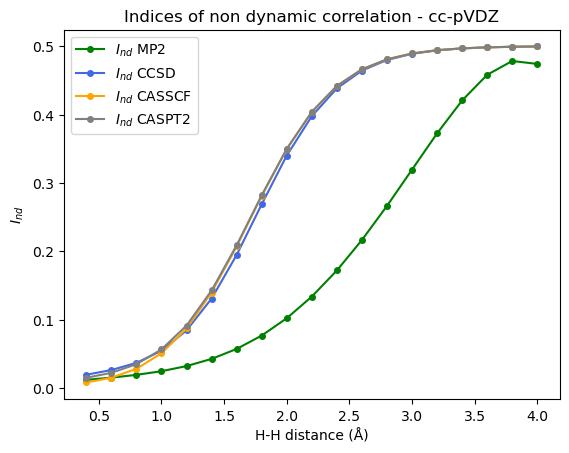

In [202]:
plt.plot(distance, Ind_MP2_array, color='green', linewidth=1.5, marker='o', markersize=4, label='$I_{nd}$ MP2')
plt.plot(distance, Ind_CCSD_array, color='royalblue', linewidth=1.5, marker='o', markersize=4, label='$I_{nd}$ CCSD')
plt.plot(distance, Ind_CASSCF_array, color='orange', linewidth=1.5, marker='o', markersize=4, label='$I_{nd}$ CASSCF')
plt.plot(distance, Ind_CASPT2_array, color='gray', linewidth=1.5, marker='o', markersize=4, label='$I_{nd}$ CASPT2')
plt.xlabel('H-H distance (Å)')
plt.ylabel('$I_{nd}$')
plt.title('Indices of non dynamic correlation - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
plt.savefig('Ind_S0.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

### Plot for non dynamic correlation

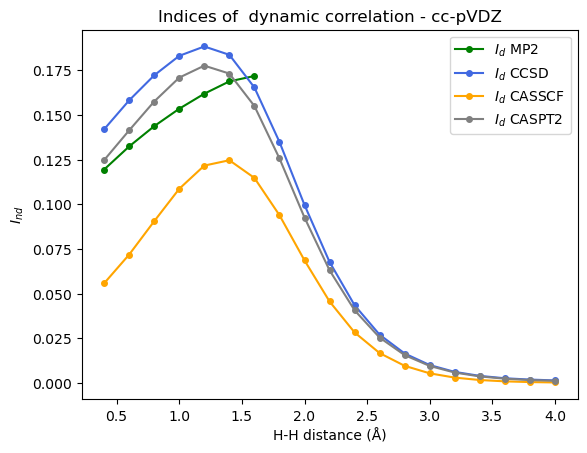

In [10]:
plt.plot(distance, Id_MP2_array, color='green', linewidth=1.5, marker='o', markersize=4, label='$I_{d}$ MP2')
plt.plot(distance, Id_CCSD_array, color='royalblue', linewidth=1.5, marker='o', markersize=4, label='$I_{d}$ CCSD')
plt.plot(distance, Id_CASSCF_array, color='orange', linewidth=1.5, marker='o', markersize=4, label='$I_{d}$ CASSCF')
plt.plot(distance, Id_CASPT2_array, color='gray', linewidth=1.5, marker='o', markersize=4, label='$I_{d}$ CASPT2')
plt.xlabel('H-H distance (Å)')
plt.ylabel('$I_{nd}$')
plt.title('Indices of  dynamic correlation - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
#plt.savefig('Id_S0.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

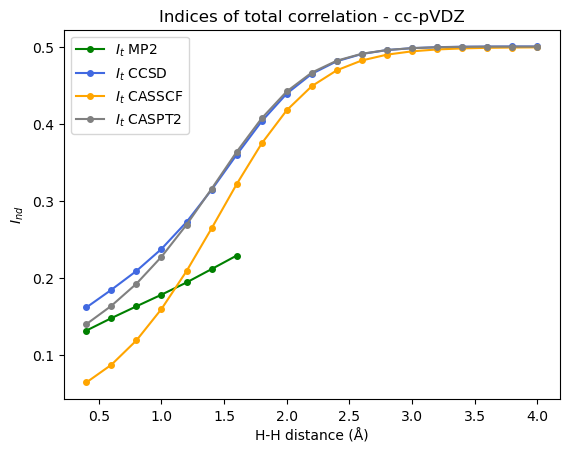

In [11]:
plt.plot(distance, It_MP2_array, color='green', linewidth=1.5, marker='o', markersize=4, label='$I_{t}$ MP2')
plt.plot(distance, It_CCSD_array, color='royalblue', linewidth=1.5, marker='o', markersize=4, label='$I_{t}$ CCSD')
plt.plot(distance, It_CASSCF_array, color='orange', linewidth=1.5, marker='o', markersize=4, label='$I_{t}$ CASSCF')
plt.plot(distance, It_CASPT2_array, color='gray', linewidth=1.5, marker='o', markersize=4, label='$I_{t}$ CASPT2')
plt.xlabel('H-H distance (Å)')
plt.ylabel('$I_{nd}$')
plt.title('Indices of total correlation - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
#plt.savefig('It_S0.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

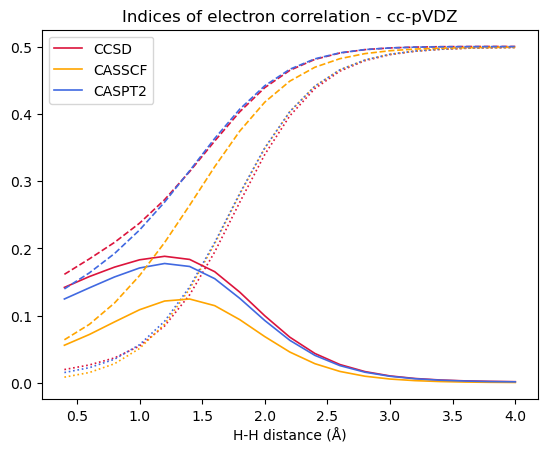

In [12]:
#plt.plot(distance, Ind_MP2_array, color='green', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Ind_CCSD_array, color='crimson', linewidth=1.2, linestyle='dotted')
plt.plot(distance, Ind_CASSCF_array, color='orange', linewidth=1.2, linestyle='dotted')
plt.plot(distance, Ind_CASPT2_array, color='royalblue', linewidth=1.2, linestyle='dotted')
#plt.plot(distance, Id_MP2_array, color='green', linewidth=1.5, linestyle='solid',  label='MP2')
plt.plot(distance, Id_CCSD_array, color='crimson', linewidth=1.2, linestyle='solid', label='CCSD')
plt.plot(distance, Id_CASSCF_array, color='orange', linewidth=1.2, linestyle='solid', label='CASSCF')
plt.plot(distance, Id_CASPT2_array, color='royalblue', linewidth=1.2, linestyle='solid', label='CASPT2')
#plt.plot(distance, It_MP2_array, color='green', linewidth=1.5, linestyle='dashed')
plt.plot(distance, It_CCSD_array, color='crimson', linewidth=1.2, linestyle='dashed')
plt.plot(distance, It_CASSCF_array, color='orange', linewidth=1.2, linestyle='dashed')
plt.plot(distance, It_CASPT2_array, color='royalblue', linewidth=1.2, linestyle='dashed')
plt.xlabel('H-H distance (Å)')
plt.title('Indices of electron correlation - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
plt.savefig('Indices_S0.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

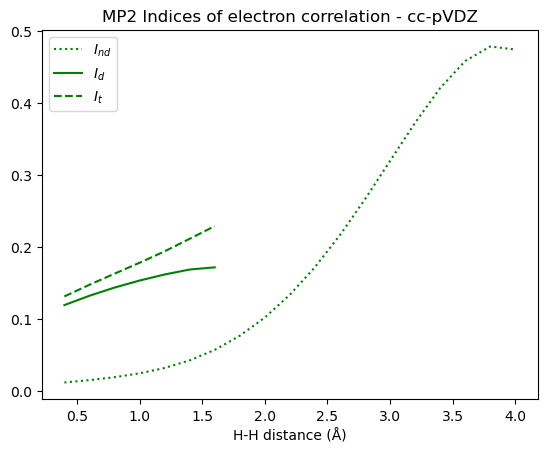

In [13]:
plt.plot(distance, Ind_MP2_array, color='green', linewidth=1.5, linestyle='dotted', label='$I_{nd}$')
plt.plot(distance, Id_MP2_array, color='green', linewidth=1.5, linestyle='solid',  label='$I_d$')
plt.plot(distance, It_MP2_array, color='green', linewidth=1.5, linestyle='dashed', label='$I_t$')
plt.xlabel('H-H distance (Å)')
plt.title('MP2 Indices of electron correlation - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
plt.savefig('IndicesMP2_S0.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

# $S_1$ values PES

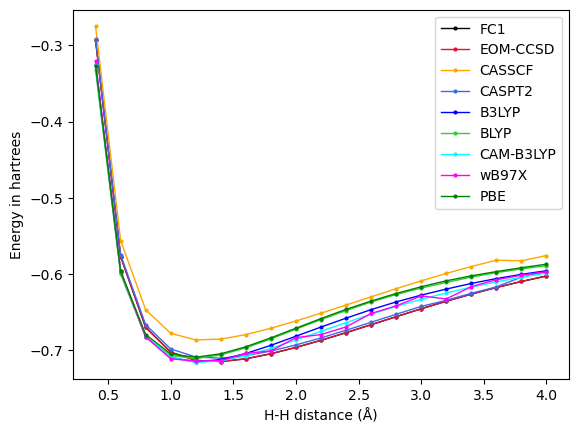

In [14]:
casscf_path = 'S1_CASSCF_PES.csv'
caspt2_path = 'S1_CASPT2_PES.csv'
eom_path = './eom-ccsd/EOM_PES.csv'
fci_path = './S1_FCI/S1_FCI_PES.csv'

df_fci = pd.read_csv(fci_path)
df_eom = pd.read_csv(eom_path)
df_casscf = pd.read_csv(casscf_path)
df_caspt2 = pd.read_csv(caspt2_path)

#Extracting values from FCI file
distance = df_fci['Distance']
FCI = df_fci['FCI-energy']
CASSCF = df_casscf['CASSCF-energy']
CASPT2 = df_caspt2['CASPT2-energy']
EOM = df_eom['EOM-energy']


#TDDFT PART
b3lyp_path =  './tddft/B3LYP/B3LYP_PES.csv'
blyp_path = './tddft/BLYP/BLYP_PES.csv'
cam_path = './tddft/CAM-B3LYP/CAM-B3LYP_PES.csv'
wb97x_path = './tddft/wB97X/wB97X_PES.csv'
pbe_path = './tddft/PBE/PBE_PES.csv'

df_b3lyp = pd.read_csv(b3lyp_path)
df_blyp = pd.read_csv(blyp_path)
df_cam = pd.read_csv(cam_path)
df_wb97x = pd.read_csv(wb97x_path)
df_pbe = pd.read_csv(pbe_path)

#Extracting values from FCI file
distance = df_fci['Distance']
B3LYP = df_b3lyp['B3LYP-energy']
BLYP = df_blyp['BLYP-energy']
CAM = df_cam['CAM-energy']
wB97X = df_wb97x['wB97X-energy']
PBE = df_pbe['PBE-energy']

#Values of reference for conversion of energy
cm = 219474.6
ev = 27.211
kj = 2625.5
kcal = 627.51
#Selecting a conversion factor
conv = kcal #Conversion using kcal/mol
#Converting all the values to kcal/mol
FCI_conv = FCI * conv
CASSCF_conv = CASSCF * conv
CASPT2_conv = CASPT2 * conv
EOM_conv = EOM * conv

# Plot histogram
plt.plot(distance, FCI, color='black', linewidth=1, marker='o', markersize=2, label='FC1')
plt.plot(distance, EOM, color='crimson', linewidth=1, marker='o', markersize=2, label='EOM-CCSD')
plt.plot(distance, CASSCF, color='orange', linewidth=1, marker='o', markersize=2, label='CASSCF')
plt.plot(distance, CASPT2, color='royalblue', linewidth=1, marker='o', markersize=2, label='CASPT2')
plt.plot(distance, B3LYP, color='blue', linewidth=1, marker='o', markersize=2, label='B3LYP')
plt.plot(distance, BLYP, color='limegreen', linewidth=1, marker='o', markersize=2, label='BLYP')
plt.plot(distance, CAM, color='cyan', linewidth=1, marker='o', markersize=2, label='CAM-B3LYP')
plt.plot(distance, wB97X, color='magenta', linewidth=1, marker='o', markersize=2, label='wB97X')
plt.plot(distance, PBE, color='green', linewidth=1, marker='o', markersize=2, label='PBE')

plt.xlabel('H-H distance (Å)')
plt.ylabel('Energy in hartrees')

# Displaying legend
plt.legend()


# SAVING THE PLOT
plt.savefig('H2_S1_PES', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

# Plot histogram

## Calculation of correlation indices for $S_1$

In [15]:
#Indices of correlation for EOM-CCSD

eom_path_NOO = './eom-ccsd/all_EOM.csv'
df_NOO_eom = pd.read_csv(eom_path_NOO)

Ind_EOM = []
Id_EOM = []
It_EOM = []

for i in range(len(df_NOO_eom)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_eom.iloc[i,1:].values * (2 - df_NOO_eom.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_eom.iloc[i,1:].values * (2 - df_NOO_eom.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_EOM.append(It)
    Id_EOM.append(Id)
    Ind_EOM.append(Ind)
  
Ind_EOM_array = np.array(Ind_EOM)
Id_EOM_array = np.array(Id_EOM)
It_EOM_array = np.array(It_EOM)

In [16]:
#Correlation indices for CASSCF
casscf_path_NOO = 'all_CASSCF_S1.csv'
df_NOO_casscf = pd.read_csv(casscf_path_NOO)

Ind_CASSCF = []
Id_CASSCF = []
It_CASSCF = []

for i in range(len(df_NOO_casscf)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_casscf.iloc[i,1:].values * (2 - df_NOO_casscf.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_casscf.iloc[i,1:].values * (2 - df_NOO_casscf.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_CASSCF.append(It)
    Id_CASSCF.append(Id)
    Ind_CASSCF.append(Ind)
  
Ind_CASSCF_array = np.array(Ind_CASSCF)
Id_CASSCF_array = np.array(Id_CASSCF)
It_CAASCF_array = np.array(It_CASSCF)

In [17]:
#Correlation indices for CASPT2
caspt2_path_NOO = 'all_CASPT2_S1.csv'
df_NOO_caspt2 = pd.read_csv(caspt2_path_NOO)

Ind_CASPT2 = []
Id_CASPT2 = []
It_CASPT2 = []

for i in range(len(df_NOO_caspt2)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_caspt2.iloc[i,1:].values * (2 - df_NOO_caspt2.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_caspt2.iloc[i,1:].values * (2 - df_NOO_caspt2.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_CASPT2.append(It)
    Id_CASPT2.append(Id)
    Ind_CASPT2.append(Ind)
  
Ind_CASPT2_array = np.array(Ind_CASPT2)
Id_CASPT2_array = np.array(Id_CASPT2)
It_CASPT2_array = np.array(It_CASPT2)

### Graphic for nondynamic correlation

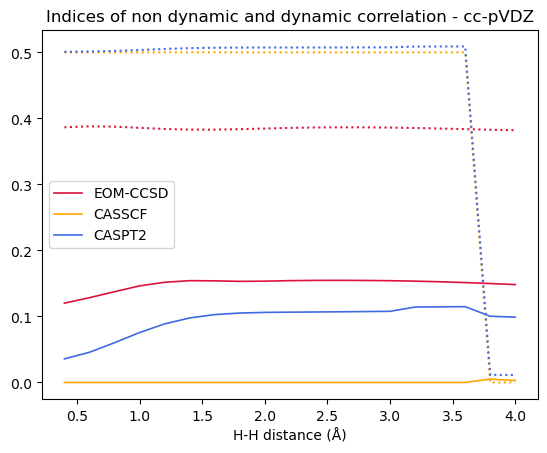

In [18]:
plt.plot(distance, Ind_EOM_array, color='crimson', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Ind_CASSCF_array, color='orange', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Ind_CASPT2_array, color='royalblue', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Id_EOM_array, color='crimson', linewidth=1.2, linestyle='solid', label='EOM-CCSD')
plt.plot(distance, Id_CASSCF_array, color='orange', linewidth=1.2, linestyle='solid', label='CASSCF')
plt.plot(distance, Id_CASPT2_array, color='royalblue', linewidth=1.2, linestyle='solid', label='CASPT2')
plt.xlabel('H-H distance (Å)')
plt.title('Indices of non dynamic and dynamic correlation - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
plt.savefig('Indices_S1.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

### Graphic for total correlation

### Hydrogen comparasion of correlation indices

## For DFT

In [19]:
#Correlation indices for B3LYP
b3lyp_path_NOO = './tddft/B3LYP/all_B3LYP.csv'
df_NOO_b3lyp = pd.read_csv(b3lyp_path_NOO)

Ind_B3LYP = []
Id_B3LYP = []
It_B3LYP = []

for i in range(len(df_NOO_b3lyp)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_b3lyp.iloc[i,1:].values * (2 - df_NOO_b3lyp.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_b3lyp.iloc[i,1:].values * (2 - df_NOO_b3lyp.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_B3LYP.append(It)
    Id_B3LYP.append(Id)
    Ind_B3LYP.append(Ind)
  
Ind_B3LYP_array = np.array(Ind_B3LYP)
Id_B3LYP_array = np.array(Id_B3LYP)
It_B3LYP_array = np.array(It_B3LYP)


#Correlation indices for BLYP
blyp_path_NOO = './tddft/BLYP/all_BLYP.csv'
df_NOO_blyp = pd.read_csv(blyp_path_NOO)

Ind_BLYP = []
Id_BLYP = []
It_BLYP = []

for i in range(len(df_NOO_blyp)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_blyp.iloc[i,1:].values * (2 - df_NOO_blyp.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_blyp.iloc[i,1:].values * (2 - df_NOO_blyp.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_BLYP.append(It)
    Id_BLYP.append(Id)
    Ind_BLYP.append(Ind)
  
Ind_BLYP_array = np.array(Ind_BLYP)
Id_BLYP_array = np.array(Id_BLYP)
It_BLYP_array = np.array(It_BLYP)


#Correlation indices for CAM-B3LYP
cam_path_NOO = './tddft/CAM-B3LYP/all_CAM-B3LYP.csv'
df_NOO_cam = pd.read_csv(cam_path_NOO)

Ind_CAM = []
Id_CAM = []
It_CAM = []

for i in range(len(df_NOO_cam)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_cam.iloc[i,1:].values * (2 - df_NOO_cam.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_cam.iloc[i,1:].values * (2 - df_NOO_cam.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_CAM.append(It)
    Id_CAM.append(Id)
    Ind_CAM.append(Ind)
  
Ind_CAM_array = np.array(Ind_CAM)
Id_CAM_array = np.array(Id_CAM)
It_CAM_array = np.array(It_CAM)


#Correlation indices for wB97X
wb97x_path_NOO = './tddft/wB97X/all_wB97X.csv'
df_NOO_wb97x = pd.read_csv(wb97x_path_NOO)

Ind_wB97X = []
Id_wB97X = []
It_wB97X = []

for i in range(len(df_NOO_wb97x)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_wb97x.iloc[i,1:].values * (2 - df_NOO_wb97x.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_wb97x.iloc[i,1:].values * (2 - df_NOO_wb97x.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_wB97X.append(It)
    Id_wB97X.append(Id)
    Ind_wB97X.append(Ind)
  
Ind_wB97X_array = np.array(Ind_wB97X)
Id_wB97X_array = np.array(Id_wB97X)
It_wB97X_array = np.array(It_wB97X)

#Correlation indices for PBE
pbe_path_NOO = './tddft/PBE/all_PBE.csv'
df_NOO_pbe = pd.read_csv(pbe_path_NOO)

Ind_PBE = []
Id_PBE = []
It_PBE = []

for i in range(len(df_NOO_pbe)):
    Ind = (1/(nelec*2)) * (np.sum(df_NOO_pbe.iloc[i,1:].values * (2 - df_NOO_pbe.iloc[i,1:].values)))
    Id = ((1/4)* np.sum((df_NOO_pbe.iloc[i,1:].values * (2 - df_NOO_pbe.iloc[i,1:].values))**(1/2))) - Ind
    It = Ind + Id
    It_PBE.append(It)
    Id_PBE.append(Id)
    Ind_PBE.append(Ind)
  
Ind_PBE_array = np.array(Ind_PBE)
Id_PBE_array = np.array(Id_PBE)
It_PBE_array = np.array(It_PBE)

### Graphics

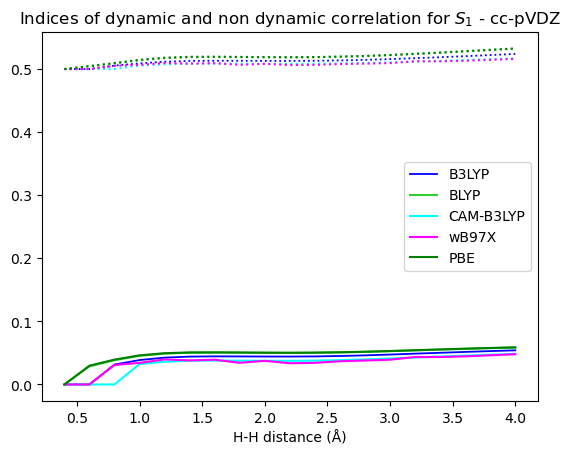

In [20]:
plt.plot(distance, Ind_B3LYP_array, color='blue', linewidth=1.3, linestyle='dotted')
plt.plot(distance, Ind_BLYP_array, color='limegreen', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Ind_CAM_array, color='cyan', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Ind_wB97X_array, color='magenta', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Ind_PBE_array, color='green', linewidth=1.5, linestyle='dotted')
plt.plot(distance, Id_B3LYP_array, color='blue', linewidth=1.3, linestyle='solid', label='B3LYP')
plt.plot(distance, Id_BLYP_array, color='limegreen', linewidth=1.5, linestyle='solid', label='BLYP')
plt.plot(distance, Id_CAM_array, color='cyan', linewidth=1.5, linestyle='solid', label='CAM-B3LYP')
plt.plot(distance, Id_wB97X_array, color='magenta', linewidth=1.5, linestyle='solid', label='wB97X')
plt.plot(distance, Id_PBE_array, color='green', linewidth=1.5, linestyle='solid',label='PBE')


plt.xlabel('H-H distance (Å)')
plt.title('Indices of dynamic and non dynamic correlation for $S_1$ - cc-pVDZ')

# Displaying legend
plt.legend()

# SAVING THE PLOT
plt.savefig('Indices_tddft_S1.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()

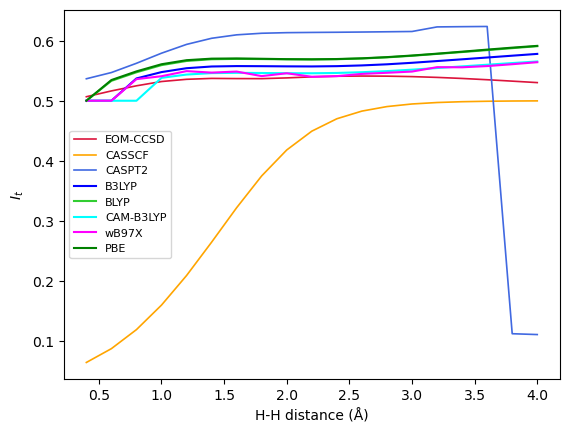

In [21]:
plt.plot(distance, It_EOM_array, color='crimson', linewidth=1.2, label='EOM-CCSD')
plt.plot(distance, It_CASSCF_array, color='orange', linewidth=1.2,label='CASSCF')
plt.plot(distance, It_CASPT2_array, color='royalblue', linewidth=1.2,label='CASPT2')
plt.plot(distance, It_B3LYP_array, color='blue', linewidth=1.5, label='B3LYP')
plt.plot(distance, It_BLYP_array, color='limegreen', linewidth=1.5, label='BLYP')
plt.plot(distance, It_CAM_array, color='cyan', linewidth=1.5, label='CAM-B3LYP')
plt.plot(distance, It_wB97X_array, color='magenta', linewidth=1.5, label='wB97X')
plt.plot(distance, It_PBE_array, color='green', linewidth=1.5, label='PBE')
plt.xlabel('H-H distance (Å)')
plt.ylabel('$I_{t}$')

# Displaying legend
plt.legend(fontsize=8)

# SAVING THE PLOT
plt.savefig('Indices_total_S1.png', dpi=(250), bbox_inches='tight')

# Show the plot
plt.show()